In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [ ]:
df = pd.read_csv('car_evaluation.csv', header = None)

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # 범주형 데이터만 변환
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

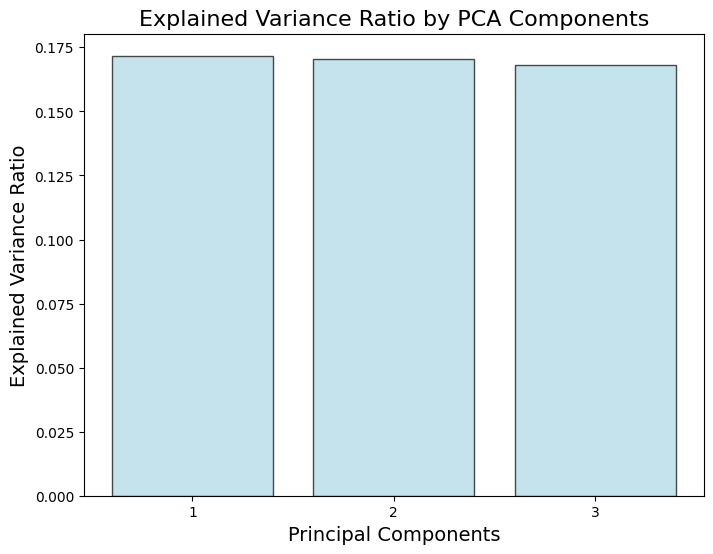

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)
y_pred_original = rf.predict(x_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# PCA 적용
pca = PCA(n_components=3)  # 3D 시각화를 위해 3개 주성분 사용
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# PCA 적용 후 랜덤 포레스트 모델 성능 평가
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# 주성분 기여도 시각화
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='lightblue', edgecolor='black')
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance Ratio by PCA Components', fontsize=16)
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()



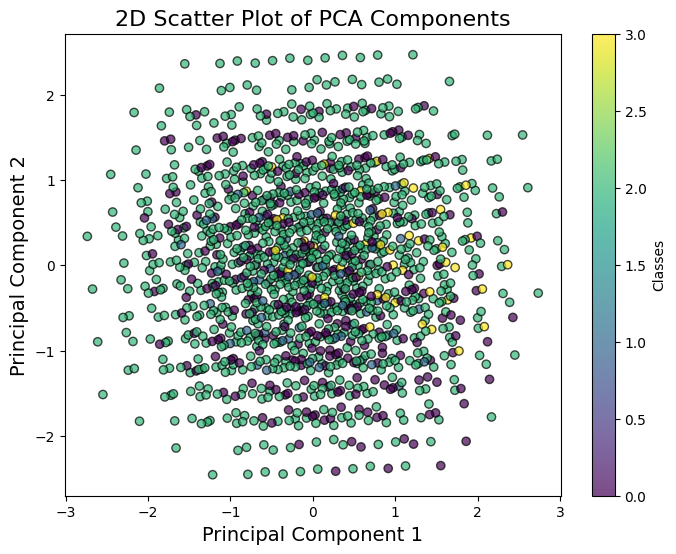

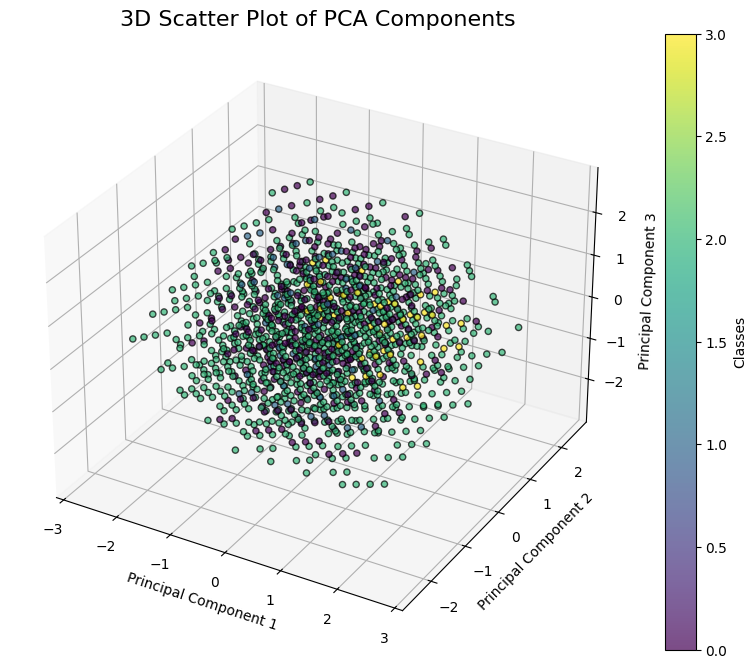

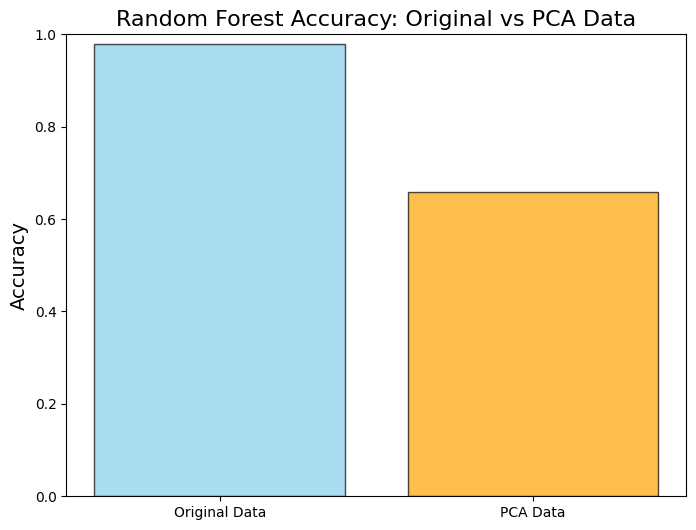

In [ ]:


# PCA 축소 결과 시각화 (2D 및 3D)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('2D Scatter Plot of PCA Components', fontsize=16)
plt.colorbar(label='Classes')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components', fontsize=16)
fig.colorbar(sc, label='Classes')
plt.show()

# PCA 적용 전후 모델 성능 비교 시각화
accuracy_scores = [accuracy_original, accuracy_pca]
labels = ['Original Data', 'PCA Data']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color=['skyblue', 'orange'], edgecolor='black', alpha=0.7)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Random Forest Accuracy: Original vs PCA Data', fontsize=16)
plt.ylim(0, 1)
plt.show()